<a href="https://colab.research.google.com/github/dsk40/Newbieron-Tasks/blob/main/Flipkart_E_commerce_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk

In [2]:
df=pd.read_csv("/content/Flipkart_ecommerce_sample.csv")

In [3]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20002 entries, 0 to 20001
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  object 
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [5]:
df.shape

(20002, 15)

In [6]:
df.isnull().sum()

uniq_id                       2
crawl_timestamp               2
product_url                   2
product_name                  2
product_category_tree         2
pid                           2
retail_price                 80
discounted_price             80
image                         5
is_FK_Advantage_product       2
description                   4
product_rating                2
overall_rating                2
brand                      5866
product_specifications       16
dtype: int64

In [7]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [8]:
# Making a copy of orginal data
#flipkart_data = df.copy()

In [9]:
df.drop(df.columns[[0,1,2,5,8,9,11,12,14]], axis=1, inplace=True)

#Lets View the data Now
df

,product_name,product_category_tree,retail_price,discounted_price,description,brand
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,Key Features of Alisha Solid Women's Cycling S...,Alisha
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",999.0,499.0,Key Features of AW Bellies Sandals Wedges Heel...,AW
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",699.0,267.0,Key Features of Alisha Solid Women's Cycling S...,Alisha
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",220.0,210.0,Specifications of Sicons All Purpose Arnica Do...,Sicons
...,...,...,...,...,...,...
19997,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",1299.0,999.0,Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection
19998,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",1499.0,1199.0,Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection
19999,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",1499.0,999.0,Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection
20000,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Save the DataFrame to a CSV file
df.to_csv('data.csv', index=False)

In [10]:
import re

In [12]:
# Define a function to extract the category using regex
def extract_category(tree_string):
    if isinstance(tree_string, str):
        match = re.search(r'\[(.*?)>>', tree_string)
        return match.group(1).strip() if match else None
    else:
        return None

# Apply the function to create the 'category' column
df['category'] = df['product_category_tree'].apply(extract_category)

In [14]:
# Remove double quotes (") from the 'category' column
df['category'] = df['category'].str.replace('"', '')


In [15]:
df

,product_name,product_category_tree,retail_price,discounted_price,description,brand,category
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,Furniture
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",999.0,499.0,Key Features of AW Bellies Sandals Wedges Heel...,AW,Footwear
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",699.0,267.0,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",220.0,210.0,Specifications of Sicons All Purpose Arnica Do...,Sicons,Pet Supplies
...,...,...,...,...,...,...,...
19997,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",1299.0,999.0,Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection,Baby Care
19998,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",1499.0,1199.0,Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection,Baby Care
19999,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",1499.0,999.0,Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection,Baby Care
20000,NaN,NaN,NaN,NaN,NaN,NaN,None


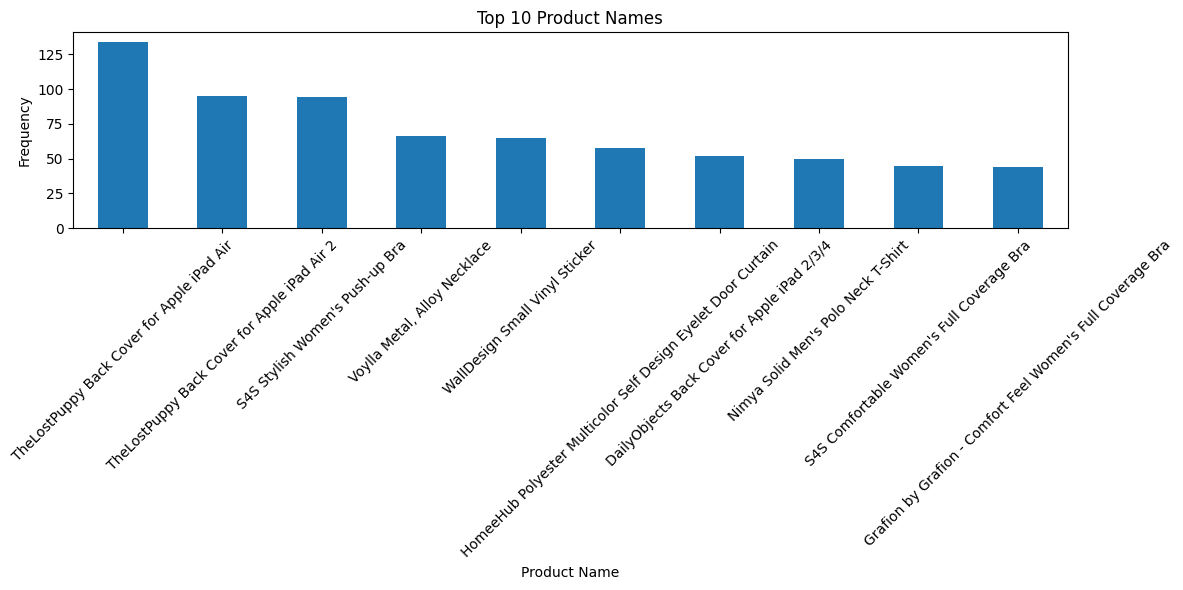

In [17]:
# Bar plot for product_name
plt.figure(figsize=(12, 6))
df['product_name'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Product Name')
plt.ylabel('Frequency')
plt.title('Top 10 Product Names')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

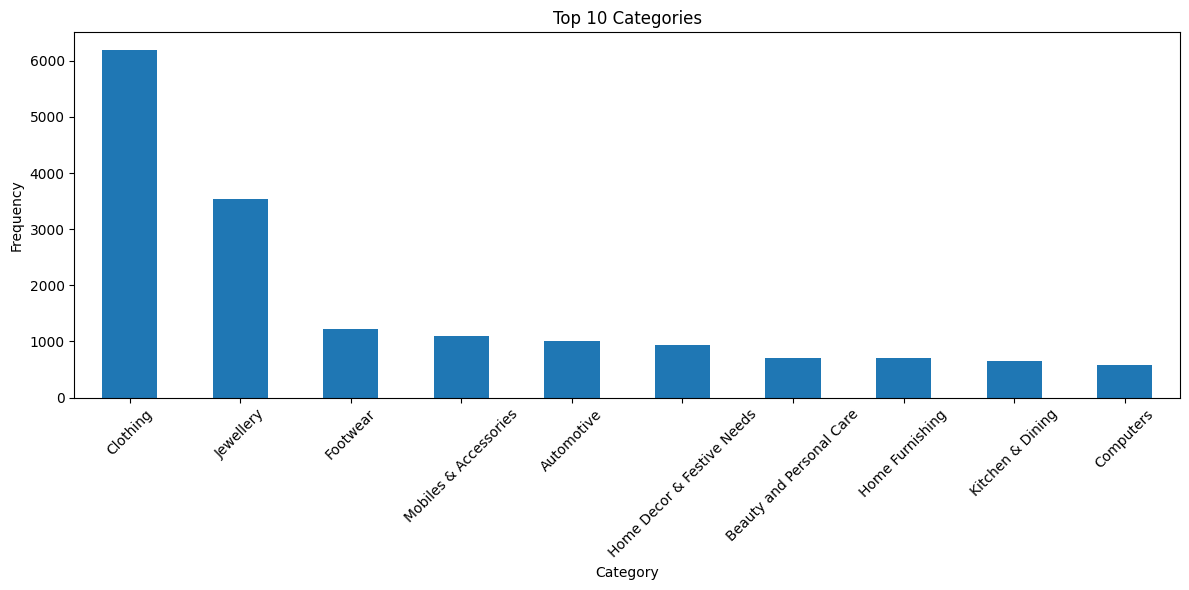

In [22]:
# Bar plot for product_category_tree
plt.figure(figsize=(12, 6))
df['category'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Top 10 Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


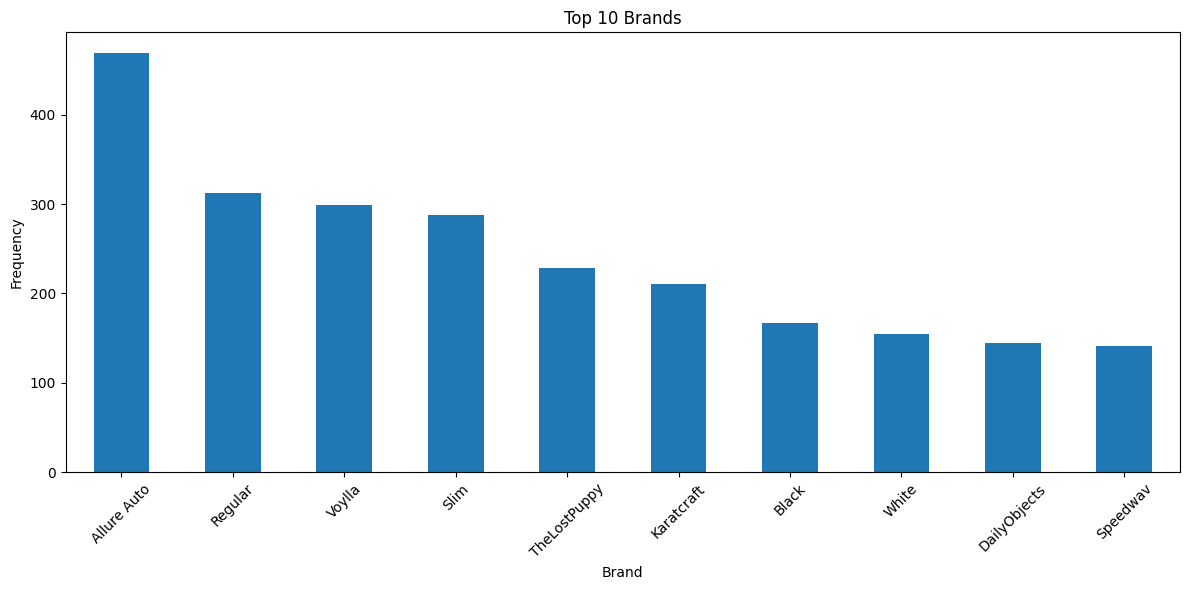

In [21]:
# Bar plot for brand
plt.figure(figsize=(12, 6))
df['brand'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.title('Top 10 Brands')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-29-ff371ecc53d4>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['retail_price'], label='Retail Price', shade=True)
<ipython-input-29-ff371ecc53d4>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['discounted_price'], label='Discounted Price', shade=True)


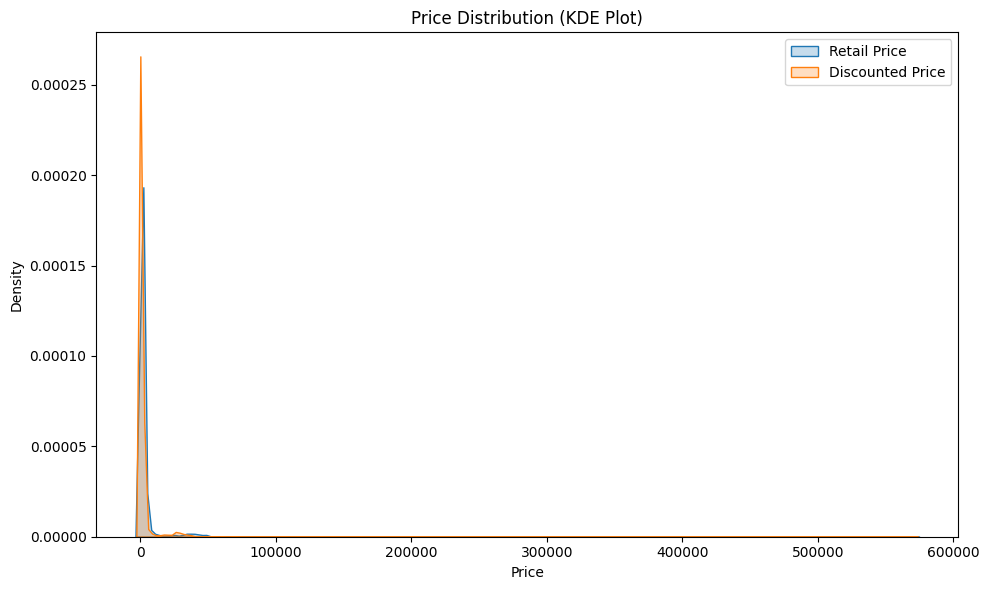

In [29]:
# KDE plot for retail_price and discounted_price
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['retail_price'], label='Retail Price', shade=True)
sns.kdeplot(data=df['discounted_price'], label='Discounted Price', shade=True)
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Price Distribution (KDE Plot)')
plt.legend()
plt.tight_layout()
plt.show()